In [3]:
# Libraries
import os
import random
from datetime import datetime, date, timedelta
from typing import Dict, List, Tuple, Union
from pathlib import Path
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
class dataops():
    def __init__(self)->None:
        """"""
        pass

    def set_path(self,
                downlods_path:Path[Union, str],
                metafilename:str,
                netcdffilename:str)-> None:
        """
        Args:
        downloads_path = Set the path where the downloaded meta and netcdf files are
        metafilename = input the metadata file name inclusing extension(.csv)
        netcdffilename = as suggested above including the extension(.netcdf)
        """
        #Setting the path and loading the datasets
        # downlods_path = Path(r"c:\\Users\\vardh\\OneDrive - University of Leicester\\OCF\\Git_repos\\downloads")
        self.dl_path = downlods_path
        self.uk_pv_meta_path = Path(os.path.join(self.dl_path, metafilename))
        self.uk_pv_netcdf_path = Path(os.path.join(self.dl_path, netcdffilename)) 
    
    def load_data(self)->None:
        """
        Reading the data into variables
        """
        dataops.metadata_df = pd.read_csv(self.uk_pv_meta_path.as_posix())
        dataops.pv_power = xr.open_dataset(self.uk_pv_netcdf_path.as_posix(), engine="h5netcdf")

if __name__ == "__main__":
    dops = dataops()
    dops.set_path(downlods_path = r"c:\\Users\\vardh\\OneDrive - University of Leicester\\OCF\\Git_repos\\downloads",
                metafilename = "uk_pv_metadata.csv",
                netcdffilename = "uk_pv_netcdf.netcdf")
    dops.load_data()

c:\Users\vardh\Anaconda3\envs\pv_data_eda\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


Randomly selected SSID is  10003
Randomly selected date is 2020-01-26


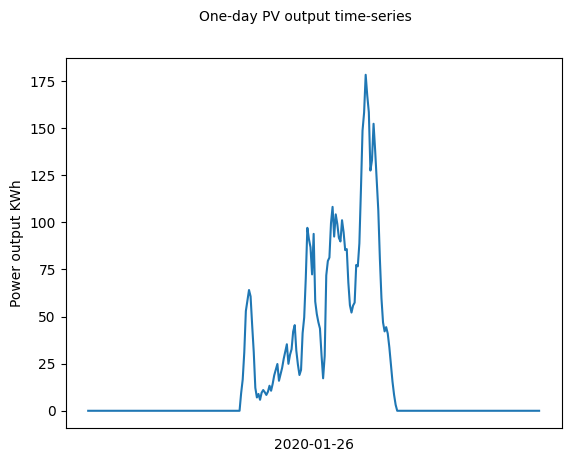

In [60]:
class xr_df():
    def __init__(self):
        self.ssid = random.choice(list(dataops.pv_power))
        self.ssid = "10003"
        print("Randomly selected SSID is ", self.ssid)
    
    def dates_list(self)->None:
        """
        Converts dates as coorniates from xarray dataset to a list
        """
        self.dates_lst = dataops.pv_power.coords["datetime"].values
        self.dates_lst = [pd.to_datetime(str(i))for i in self.dates_lst]
        self.dates_lst = [i.strftime('%Y-%m-%d') for i in self.dates_lst]
        xr_df.dates_lst = list(set(self.dates_lst))
                    
    def xr_to_df(self)-> None:
        """
        converts xarray dataset into a pandas dataframe
        """
        self.date_oi = random.choice(xr_df.dates_lst)
        print("Randomly selected date is", self.date_oi) 
        # self.date_oi = "2021-10-24"     
        self.date_1 = datetime.strptime(self.date_oi, '%Y-%m-%d')
        self.next_day = self.date_1+timedelta(days=1)
        self.on_pv_system = dataops.pv_power[self.ssid].to_dataframe()
        self.on_pv_system = self.on_pv_system[(self.on_pv_system.index < self.next_day)&(self.on_pv_system.index > self.date_1)]

    def display(self)->None:
        """
        Plot the PV output of the day that is randomly selected with SSID and a date
        """
        fig = plt.figure()
        plt.plot(self.on_pv_system)
        fig.suptitle("One-day PV output time-series", fontsize = 10)
        plt.ylabel('Power output KWh', fontsize = 10)
        plt.xlabel(self.date_oi, fontsize = 10)
        plt.xticks([])

if __name__=="__main__":
    xrdf = xr_df()
    xrdf.dates_list()
    xrdf.xr_to_df()
    xrdf.display()

In [57]:
class no_pv_output():
    def __init__(self)->None:
        """"""
        pass
    def pv_output(self)->None:
        """
        This function gives a dictionary that stores 
        all the SSID with corresponding dates with no PV output
        """
        self.ssid_list = list(dataops.pv_power)
        no_pv_dict = {}
        for i in range(len(self.ssid_list)):
            self.ssid_pv_df = dataops.pv_power[self.ssid_list[i]].to_dataframe()
            for j in range(len(xr_df.dates_lst)):
                self.date_1 = datetime.strptime(xr_df.dates_lst[j], '%Y-%m-%d')
                self.next_day = self.date_1+timedelta(days=1)
                self.on_pv_system = self.ssid_pv_df[
                    (self.ssid_pv_df.index < self.next_day)
                    &
                    (self.ssid_pv_df.index > self.date_1)
                    ]                                
                torf = np.isnan(self.on_pv_system.values).all()
                if torf == True:
                    print(self.date_1,"has no PV output on this system with ID", self.ssid_list[i])
                    no_pv_dict[self.ssid_list[i]] = self.date_1
                

if __name__ == "__main__":
    npo = no_pv_output()
    npo.pv_output()

2021-02-26 00:00:00 has no PV output on this system with ID 10003
2020-04-02 00:00:00 has no PV output on this system with ID 10003
2019-07-01 00:00:00 has no PV output on this system with ID 10004
2018-12-20 00:00:00 has no PV output on this system with ID 10004
2018-09-27 00:00:00 has no PV output on this system with ID 10004
2018-03-18 00:00:00 has no PV output on this system with ID 10004
2018-12-28 00:00:00 has no PV output on this system with ID 10004
2018-05-29 00:00:00 has no PV output on this system with ID 10004
2020-04-23 00:00:00 has no PV output on this system with ID 10004
2021-07-06 00:00:00 has no PV output on this system with ID 10004
2019-03-11 00:00:00 has no PV output on this system with ID 10004
2020-02-21 00:00:00 has no PV output on this system with ID 10004
2018-04-21 00:00:00 has no PV output on this system with ID 10004
2019-09-12 00:00:00 has no PV output on this system with ID 10004
2020-02-07 00:00:00 has no PV output on this system with ID 10004
2020-10-24

KeyboardInterrupt: 

In [ ]:
#######
#IGNORE
#######
class check_na():
    def __init__(self):
        """"""
        pass
    def iter_xr(self)-> None:
        # self.true_false = []
        # ssid_lst = list(dataops.pv_power)
        # for i in ssid_lst:
        #     torf = np.isnan(dataops.pv_power[i].values).all()
        #     self.true_false.append(torf)
        # print(self.true_false)
        ssid_list = list(dataops.pv_power)
        print(type(ssid_list))
        self.dates_lst = dataops.pv_power.coords["datetime"].values
        self.dates_lst = [pd.to_datetime(str(i))for i in self.dates_lst]
        self.dates_lst = [i.strftime('%Y-%m-%d') for i in self.dates_lst]
        print(type(self.dates_lst))

if __name__ == "__main__":
    ckna = check_na()
    ckna.iter_xr()